In [2]:
import numpy as np

a = 0.09e-6
L = 0.005
T = 1800
N = 100
h = 0.03
alpha = 18
beta = 37

delta = L / N
mu = a / (delta ** 2)
M = int(T / h) + 1

u = np.zeros(N + 1)
u[0] = alpha
u[N] = beta

def derivatives(u, mu, N):
    du_dt = np.zeros(N + 1)
    for i in range(1, N):  # i = 1..99
        du_dt[i] = mu * (u[i + 1] - 2 * u[i] + u[i - 1])
    return du_dt

def runge_kutta_4(u, h, mu, N):
    k1 = derivatives(u, mu, N)
    k2 = derivatives(u + 0.5 * h * k1, mu, N)
    k3 = derivatives(u + 0.5 * h * k2, mu, N)
    k4 = derivatives(u + h * k3, mu, N)
    return u + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

solution = np.zeros((M, N + 1))
solution[0, :] = u.copy()

for t in range(1, M):
    u = runge_kutta_4(u, h, mu, N)
    solution[t, :] = u.copy()

print(f"Температура в середині стінки (y = {L/2:.5f} м) на t = {T} с: {solution[-1, N//2]:.2f} °C")

np.save("temperature_solution.npy", solution)

C:\Users\asavc\AppData\Local\Temp\ipykernel_25512\6918857.py:27: RuntimeWarning: overflow encountered in scalar multiply
  du_dt[i] = mu * (u[i + 1] - 2 * u[i] + u[i - 1])
C:\Users\asavc\AppData\Local\Temp\ipykernel_25512\6918857.py:37: RuntimeWarning: overflow encountered in multiply
  return u + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
C:\Users\asavc\AppData\Local\Temp\ipykernel_25512\6918857.py:37: RuntimeWarning: invalid value encountered in add
  return u + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
C:\Users\asavc\AppData\Local\Temp\ipykernel_25512\6918857.py:34: RuntimeWarning: invalid value encountered in add
  k2 = derivatives(u + 0.5 * h * k1, mu, N)


Температура в середині стінки (y = 0.00250 м) на t = 1800 с: nan °C


In [19]:
import numpy as np

L = 0.005
T = 1800
N = 100
h = 0.01
M = int(T / h) + 1
alpha = 18
beta = 37
a = 0.09e-6

solution = np.load("temperature_solution.npy")

delta = L / N
y = np.linspace(0, L, N + 1)

left_indices = [0, 1, 2, 3, 4]
left_points = [y[i] for i in left_indices]

right_indices = [96, 97, 98, 99, 100]
right_points = [y[i] for i in right_indices]

final_time_index = M - 1

print("Температури з лівого боку стінки (t = 1800 с):")
for idx, y_val in zip(left_indices, left_points):
    temp = solution[final_time_index, idx]
    print(f"y = {y_val:.5f} м: {temp:.2f} °C")

print("\nТемператури з правого боку стінки (t = 1800 с):")
for idx, y_val in zip(right_indices, right_points):
    temp = solution[final_time_index, idx]
    print(f"y = {y_val:.5f} м: {temp:.2f} °C")


Температури з лівого боку стінки (t = 1800 с):
y = 0.00000 м: 18.00 °C
y = 0.00005 м: 18.19 °C
y = 0.00010 м: 18.38 °C
y = 0.00015 м: 18.57 °C
y = 0.00020 м: 18.76 °C

Температури з правого боку стінки (t = 1800 с):
y = 0.00480 м: 36.24 °C
y = 0.00485 м: 36.43 °C
y = 0.00490 м: 36.62 °C
y = 0.00495 м: 36.81 °C
y = 0.00500 м: 37.00 °C


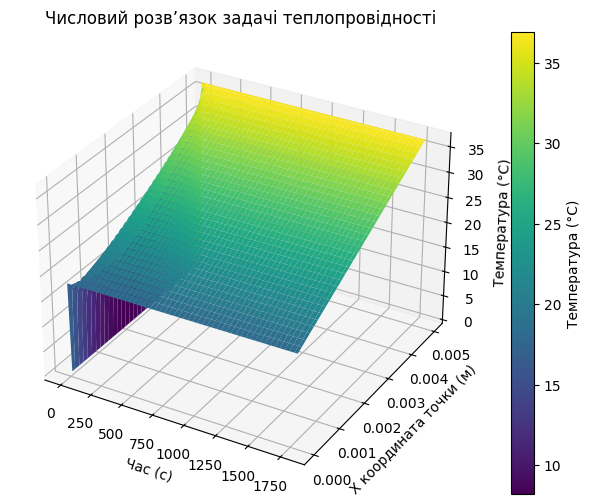

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

L = 0.005
T = 1800
N = 100
h = 0.01
M = int(T / h) + 1

solution = np.load("temperature_solution.npy")

y = np.linspace(0, L, N + 1)
t = np.linspace(0, T, M)

step = 100
t_reduced = t[::step]
solution_reduced = solution[::step, :]

T_grid, Y_grid = np.meshgrid(t_reduced, y)
Z = solution_reduced.T

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T_grid, Y_grid, Z, cmap='viridis')

ax.set_xlabel('Час (с)')
ax.set_ylabel('X координата точки (м)')
ax.set_zlabel('Температура (°C)')
ax.set_title('Числовий розв’язок задачі теплопровідності')

fig.colorbar(surf, ax=ax, label='Температура (°C)')

plt.show()


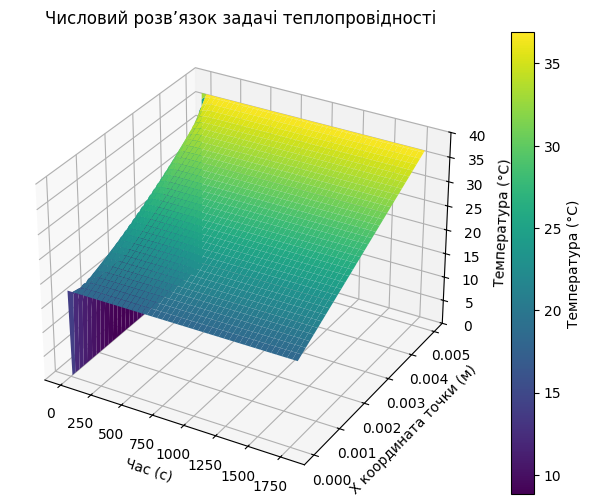

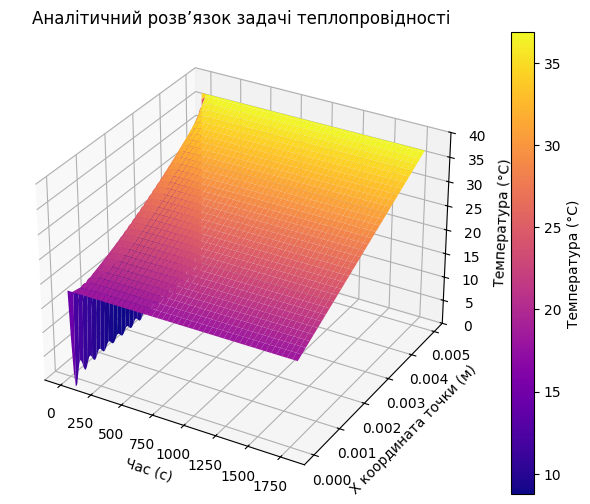

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

L = 0.005
T = 1800
N = 100
h = 0.01
M = int(T / h) + 1
alpha = 18
beta = 37
a = 0.09e-6

solution = np.load("temperature_solution.npy")

y = np.linspace(0, L, N + 1)
t = np.linspace(0, T, M)

step = 1000
t_reduced = t[::step]
solution_reduced = solution[::step, :]

T_grid, Y_grid = np.meshgrid(t_reduced, y)
Z_numeric = solution_reduced.T

Z_analytic = np.zeros_like(Z_numeric)
for i in range(len(y)):
    for j in range(len(t_reduced)):
        u = (beta - alpha) / L * y[i] + alpha
        for n in range(1, 31):
            coeff = (beta * (-1)**n - alpha) / n
            exp_term = np.exp(-((np.pi * n / L)**2) * a * t_reduced[j])
            sin_term = np.sin(np.pi * n * y[i] / L)
            u += (2 / np.pi) * coeff * exp_term * sin_term
        Z_analytic[i, j] = u

fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(T_grid, Y_grid, Z_numeric, cmap='viridis')
ax1.set_xlabel('Час (с)')
ax1.set_ylabel('X координата точки (м)')
ax1.set_zlabel('Температура (°C)')
ax1.set_title('Числовий розв’язок задачі теплопровідності')
ax1.set_zlim(0, 40)
fig1.colorbar(surf1, ax=ax1, label='Температура (°C)')
plt.show()

fig2 = plt.figure(figsize=(10, 6))
ax2 = fig2.add_subplot(111, projection='3d')
surf2 = ax2.plot_surface(T_grid, Y_grid, Z_analytic, cmap='plasma')
ax2.set_xlabel('Час (с)')
ax2.set_ylabel('X координата точки (м)')
ax2.set_zlabel('Температура (°C)')
ax2.set_title('Аналітичний розв’язок задачі теплопровідності')
ax2.set_zlim(0, 40)
fig2.colorbar(surf2, ax=ax2, label='Температура (°C)')
plt.show()


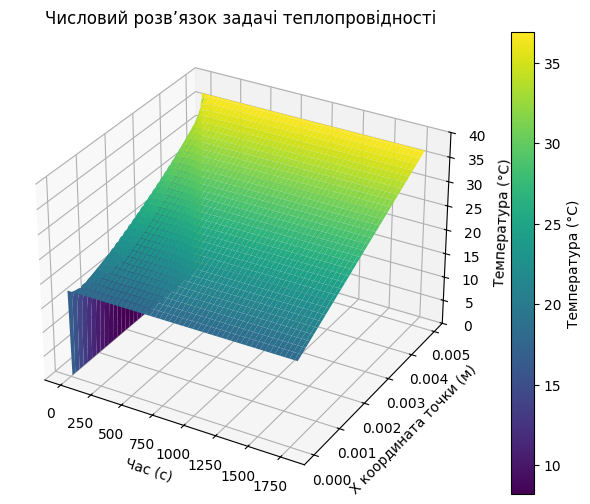

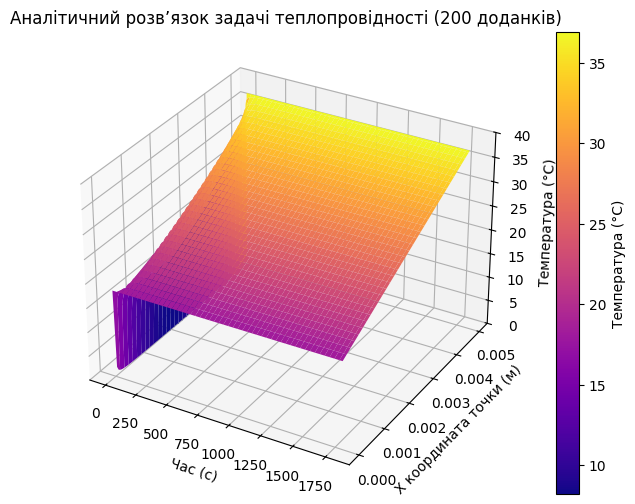

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

L = 0.005
T = 1800
N = 100
h = 0.01
M = int(T / h) + 1
alpha = 18
beta = 37
a = 0.09e-6

solution = np.load("temperature_solution.npy")

y = np.linspace(0, L, N + 1)
t = np.linspace(0, T, M)

step = 100
t_reduced = t[::step]
solution_reduced = solution[::step, :]

T_grid, Y_grid = np.meshgrid(t_reduced, y)
Z_numeric = solution_reduced.T

n_terms = 200
Z_analytic = np.zeros_like(Z_numeric)
for i in range(len(y)):
    for j in range(len(t_reduced)):
        u = (beta - alpha) / L * y[i] + alpha
        for n in range(1, n_terms + 1):
            coeff = (beta * (-1)**n - alpha) / n
            exp_term = np.exp(-((np.pi * n / L)**2) * a * t_reduced[j])
            sin_term = np.sin(np.pi * n * y[i] / L)
            u += (2 / np.pi) * coeff * exp_term * sin_term
        Z_analytic[i, j] = u

fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(T_grid, Y_grid, Z_numeric, cmap='viridis')
ax1.set_xlabel('Час (с)')
ax1.set_ylabel('X координата точки (м)')
ax1.set_zlabel('Температура (°C)')
ax1.set_title('Числовий розв’язок задачі теплопровідності')
ax1.set_zlim(0, 40)
fig1.colorbar(surf1, ax=ax1, label='Температура (°C)')
plt.show()

fig2 = plt.figure(figsize=(10, 6))
ax2 = fig2.add_subplot(111, projection='3d')
surf2 = ax2.plot_surface(T_grid, Y_grid, Z_analytic, cmap='plasma')
ax2.set_xlabel('Час (с)')
ax2.set_ylabel('X координата точки (м)')
ax2.set_zlabel('Температура (°C)')
ax2.set_title('Аналітичний розв’язок задачі теплопровідності (200 доданків)')
ax2.set_zlim(0, 40)
fig2.colorbar(surf2, ax=ax2, label='Температура (°C)')
plt.show()


In [3]:
import numpy as np

L = 0.005
T = 1800
N = 100
h = 0.01
M = int(T / h) + 1
alpha = 18
beta = 37
a = 0.09e-6

results = np.load("temperature_solution.npy")

times = np.linspace(0, T, M)
y_vals = np.linspace(0, L, N + 1)

def analytical_solution(t, y, n_terms=200):
    u_an = (beta - alpha) / L * y + alpha
    for n in range(1, n_terms + 1):
        coeff = (beta * (-1)**n - alpha) / n
        exp_term = np.exp(-((np.pi * n / L)**2) * a * t)
        sin_term = np.sin(np.pi * n * y / L)
        term = (2 / np.pi) * coeff * exp_term * sin_term
        if np.isfinite(term):
            u_an += term
    return u_an

analytical = np.zeros((M, N + 1))
for i in range(M):
    for j in range(N + 1):
        analytical[i, j] = analytical_solution(times[i], y_vals[j])

skip_steps = int(100 / h)
diff = np.abs(results[skip_steps:, :] - analytical[skip_steps:, :])
mae = np.max(diff)
mse = np.mean(diff ** 2)

print(f"MAE (без перших 100 с) = {mae:.4f} °C")
print(f"MSE (без перших 100 с) = {mse:.4f} °C^2")

MAE = 0.0023 °C
MSE = 0.0001 °C^2
